## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df= df.drop(["EIN", "NAME"], axis = 1)
application_df.head(2)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
application_df["APPLICATION_TYPE"].nunique()

17

In [6]:
# counts = application_df["APPLICATION_TYPE"].value_counts()
# treshold =200
# repl = counts[counts <= treshold].index
# df_notinuse = pd.get_dummies(application_df["APPLICATION_TYPE"].replace(repl, 'Other'))
# df_notinuse.head()

In [7]:
counts = application_df["APPLICATION_TYPE"].value_counts()
treshold = 200
repl = counts[counts <= treshold].index

for app in repl:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# # Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
# application_df['APPLICATION_TYPE'].value_counts()

In [9]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1000

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`


counts_classf = application_df["CLASSIFICATION"].value_counts()
treshold = 1000
repl_classf = counts_classf[counts_classf < treshold].index

for app in repl_classf:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# # Replace in dataframe
# for cls in classifications_to_replace:
#     application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df['CLASSIFICATION'].value_counts()

In [12]:
application_df.head(30)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [13]:
application_df.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_gd = pd.get_dummies(application_df, dtype=float)
application_df_gd.head(10)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,7508025,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df_gd.drop('IS_SUCCESSFUL', axis=1)
y = application_df_gd["IS_SUCCESSFUL"]



In [16]:
X

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y)



In [18]:
X_train

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
5426,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3104,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10284,1,244665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26394,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25038,1,5200045,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31239,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18442,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22223,1,5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16292,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
#find number of dimensions of Xtrain to uinput intpo "input_dim" variable while creating layer
print(len(X_train_scaled[0]))
X_train_scaled.shape

43


(27439, 43)

## Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=14, activation="relu", input_dim= 43))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units =7, activation="relu"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units =1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                616       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 729 (2.85 KB)
Trainable params: 729 (2.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model
nn_model.compile(loss= "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [23]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 10, validation_data=(X_test, y_test))


Epoch 1/10
466/858 [===============>..............] - ETA: 0s - loss: 0.6055 - accuracy: 0.6966

858/858 [==============================] - 3s 2ms/step - loss: 0.5883 - accuracy: 0.7092 - val_loss: 19238.6250 - val_accuracy: 0.4676
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7270 - val_loss: 15276.6523 - val_accuracy: 0.4676
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7278 - val_loss: 7368.7329 - val_accuracy: 0.4676
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7297 - val_loss: 7326.6328 - val_accuracy: 0.4676
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7297 - val_loss: 2838.7131 - val_accuracy: 0.4676
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7299 - val_loss: 1260.1030 - val_accuracy: 0.4676
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7295 - val_loss: 17110.5312 - val_accuracy: 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5525 - accuracy: 0.7259 - 361ms/epoch - 2ms/step
Loss: 0.5524918437004089, Accuracy: 0.7259474992752075


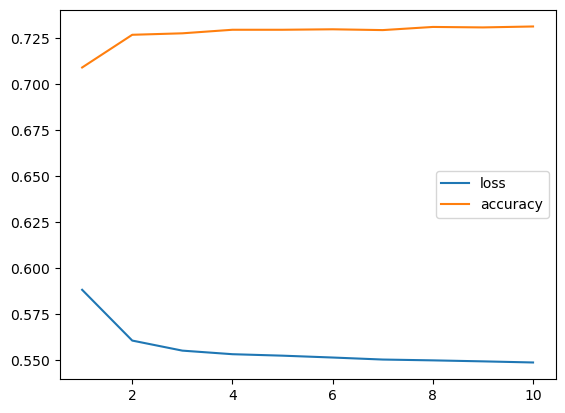

In [25]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y = ["loss", "accuracy"])

plt.show()


In [26]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

Using one hot encoder, and Keras tuner to get the best fit mode

In [27]:
application_df.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
X= application_df.drop(columns=["IS_SUCCESSFUL"], axis =1)
y = application_df["IS_SUCCESSFUL"]
X

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 42, stratify= y , test_size= 0.2)

In [31]:
X_train

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
26810,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,2588193
2568,T3,CompanySponsored,C2000,Preservation,Trust,1,25000-99999,N,12453
26044,T3,Independent,C1000,Preservation,Trust,1,0,N,5000
6201,T3,Independent,C1000,Preservation,Trust,1,0,N,5000
12018,T3,Independent,C2100,Preservation,Trust,1,50M+,N,32115046
...,...,...,...,...,...,...,...,...,...
13359,T3,CompanySponsored,C2100,Preservation,Association,1,0,N,5000
7079,T3,Independent,C1200,Preservation,Trust,1,0,N,5000
2873,T7,CompanySponsored,C1000,ProductDev,Trust,1,0,N,5000
16519,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,34340


In [32]:
transformer =  ColumnTransformer( transformers=[
    ('tnf1', OneHotEncoder(sparse= False, drop = 'first'), ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'  ] ) 
], remainder='passthrough')  # not creating a sparse array and dropping first column to show there is no mathematically co relation and to improve multi correality

In [33]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

c:\Users\ljm47\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
X_train_transformed.shape

(27439, 36)

In [35]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train_transformed)

# Scale the data
X_train_scaled = X_scaler.transform(X_train_transformed)
X_test_scaled = X_scaler.transform(X_test_transformed)

#Ideally we should have scaled only the "ASK_AMT" column

In [36]:
X_train_scaled.shape

(27439, 36)

now creating a Keras tuner

In [37]:
import keras_tuner as kt

In [39]:
def create_model(hp):

    nn_model = tf.keras.models.Sequential()
    counter = 0 #initialising the counter to 0 because we will write a IF LOOP to pass the first layer

  

   # Allow kerastuner to decide which OPTIMIZER function to use while COMPILING the model
    optimizer = hp.Choice('optimizer', values =  ["adam", 'sgd', 'rmsprop', 'adadelta'])

    #setting up to choose how many hidden layers to be added

    for i in range(hp.Int('num_layers', min_value = 1 , max_value = 10)): #choosing the minimum and maximum layer and model will run 10 models 
        if counter == 0:  #CREARTING THE FIRST INPUT LAYER WHEN COUNTER = 0
            nn_model.add(tf.keras.layers.Dense(hp.Int('units'+str(i),       #We neeed to add this as everytime it loops the string has to be different and cannot be 'units'
            min_value = 8, 
            max_value = 128,
            step = 8), activation= hp.Choice('activation' + str(i),values = ['relu','tanh', 'sigmoid']), input_dim = 36
            )
            )
        else : #if counter is not 0 then create hidden layers
            nn_model.add(tf.keras.layers.Dense(hp.Int('units'+str(i),
            min_value = 8, 
            max_value = 128,
            step = 8), activation= hp.Choice('activation' + str(i),values = ['relu','tanh', 'sigmoid'])
            )
            )
        counter += 1
    
    #create last output layer with 1 nueron
    nn_model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

    nn_model.compile( optimizer=optimizer, loss = 'binary_crossentropy' , metrics=["accuracy"])

    return nn_model




In [40]:
#Now we have to create the tuner object
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials= 5
)

In [41]:
#this is the model.fit step

tuner.search(X_train_scaled, y_train, epochs =25, validation_data= (X_test_scaled, y_test) )

Trial 5 Complete [00h 00m 56s]
val_accuracy: 0.7256559729576111

Best val_accuracy So Far: 0.7262390851974487
Total elapsed time: 00h 04m 46s
INFO:tensorflow:Oracle triggered exit


In [42]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam',
 'num_layers': 7,
 'units0': 56,
 'activation0': 'relu',
 'units1': 104,
 'activation1': 'relu',
 'units2': 72,
 'activation2': 'sigmoid',
 'units3': 64,
 'activation3': 'sigmoid',
 'units4': 48,
 'activation4': 'relu',
 'units5': 96,
 'activation5': 'tanh',
 'units6': 8,
 'activation6': 'sigmoid',
 'units7': 88,
 'activation7': 'relu',
 'units8': 72,
 'activation8': 'sigmoid'}

In [43]:
best_hyper = tuner.get_best_hyperparameters(3)   #prints top 3 best optimizers
for param in best_hyper:
    print(param.values)

{'optimizer': 'adam', 'num_layers': 7, 'units0': 56, 'activation0': 'relu', 'units1': 104, 'activation1': 'relu', 'units2': 72, 'activation2': 'sigmoid', 'units3': 64, 'activation3': 'sigmoid', 'units4': 48, 'activation4': 'relu', 'units5': 96, 'activation5': 'tanh', 'units6': 8, 'activation6': 'sigmoid', 'units7': 88, 'activation7': 'relu', 'units8': 72, 'activation8': 'sigmoid'}
{'optimizer': 'rmsprop', 'num_layers': 5, 'units0': 64, 'activation0': 'tanh', 'units1': 48, 'activation1': 'tanh', 'units2': 80, 'activation2': 'sigmoid', 'units3': 32, 'activation3': 'tanh', 'units4': 104, 'activation4': 'tanh', 'units5': 128, 'activation5': 'relu', 'units6': 104, 'activation6': 'sigmoid', 'units7': 120, 'activation7': 'relu', 'units8': 40, 'activation8': 'sigmoid'}
{'optimizer': 'adam', 'num_layers': 8, 'units0': 88, 'activation0': 'tanh', 'units1': 8, 'activation1': 'relu', 'units2': 8, 'activation2': 'relu', 'units3': 8, 'activation3': 'relu', 'units4': 8, 'activation4': 'relu', 'units5'

In [44]:
best_model=tuner.get_best_models(num_models=1)[0]
  

In [45]:
best_model.fit(X_train_scaled, y_train,  epochs= 50, initial_epoch= 25) #initial epoch is 6 because we did 5 epochs at tuner.search stage

Epoch 26/50
858/858 [==============================] - 4s 2ms/step - loss: 0.5446 - accuracy: 0.7363
Epoch 27/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5438 - accuracy: 0.7354
Epoch 28/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5436 - accuracy: 0.7364
Epoch 29/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5432 - accuracy: 0.7373
Epoch 30/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.7353
Epoch 31/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5431 - accuracy: 0.7370
Epoch 32/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7357
Epoch 33/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7358
Epoch 34/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5422 - accuracy: 0.7383
Epoch 35/50
858/858 [==============================] - 2s 3ms/step - loss: 0.5420 - accurac

In [46]:
best_model.evaluate(X_test_scaled, y_test, verbose=2)

215/215 - 0s - loss: 0.5549 - accuracy: 0.7259 - 437ms/epoch - 2ms/step


[0.5548515915870667, 0.7259474992752075]

In [47]:
best_model = tuner.get_best_models(3)
for model in best_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose =2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5527 - accuracy: 0.7262 - 588ms/epoch - 3ms/step
Loss: 0.5526779890060425, Accuracy: 0.7262390851974487
215/215 - 1s - loss: 0.5592 - accuracy: 0.7257 - 566ms/epoch - 3ms/step
Loss: 0.5592410564422607, Accuracy: 0.7256559729576111
215/215 - 1s - loss: 0.5564 - accuracy: 0.7251 - 532ms/epoch - 2ms/step
Loss: 0.5564455389976501, Accuracy: 0.7250728607177734


The report should contain the following:

Overview of the analysis: Explain the purpose of this analysis. 
The features in the provided dataset was used to create a binary classifier that can predict whether applicants will be successful if funded by Alphabet Soup.


Results: Using bulleted lists and images to support your answers, address the following questions:

Data Preprocessing

What variable(s) are the target(s) for your model? 
    - " IS_SUCCESSFUL is the target variable

What variable(s) are the features for your model? 
    - We have removed the Columns EIN and NAME as they were not helpful in determing the model predictions. Apart from that rest of the columns are all features

What variable(s) should be removed from the input data because they are neither targets nor features? 
    - EIN and NAME

Compiling, Training, and Evaluating the Model : 

How many neurons, layers, and activation functions did you select for your neural network model, and why? 
    - We started with 14 neaurons in input layer and then 7 and then 1 in output layer.  We then used keras tuner to get a model with the best parameters.

Were you able to achieve the target model performance? : 
    - We were able to measure the model performance with an accuracy of 73%

What steps did you take in your attempts to increase model performance?
    - did a Keras tuner to get the best model. We can increase the performance by probably increasing the EPOCS

Summary: Summarize the overall results of the deep learning model. Include a recommendation for how a different model could solve this classification problem, and then explain your recommendation.
    - We could use Random Forest Machine learning algorithm. 